<a href="https://www.kaggle.com/code/syedafraz/financial-news-analysis-and-stock-prediction?scriptVersionId=218751159" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Financial News Analysis and Stock Price Prediction

1. Perform EDA on a financial dataset.
2. Extract stock names or ticker symbols using NLP.
3. Retrieve financial data using APIs or publicly available datasets.
4. Forecast stock prices of stock financial data gathered from step 3.
5. Sentimental analysis on finalcal dataset.

****
****

# Step 1
**Exploratory Data Analysis (EDA) and Handling Missing and duplicate values**

The **Natural Language Toolkit (NLTK)** is a platform used for building Python programs that work with human language data for applying in statistical natural language processing (NLP).

It contains text processing libraries for tokenization, parsing, classification, stemming, tagging and semantic reasoning.

I will use it in:
* Step 1 : for creating a wordcloud
* step 5 : For sentiment analysis of Financal articles.

In [1]:
!pip install nltk

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from datetime import datetime, timedelta



**Load the Dataset:**

Load the dataset of stock financial articles in my notebook

In [3]:
# Load the dataset
df = pd.read_csv('/kaggle/input/financial-news-dataset/reuters_headlines.csv') 

* **EDA on dataset**


In [4]:

print("Display Columns:", df.columns,
      "\nData Size:", df.shape,
      "\n\nData Types:\n", df.dtypes)

Display Columns: Index(['Headlines', 'Time', 'Description'], dtype='object') 
Data Size: (32841, 3) 

Data Types:
 Headlines      object
Time           object
Description    object
dtype: object


In [5]:
# Inspect the dataset
print("\n\nTop 10 Columns:",df.head(10))
print("\nLast 10 Columns: ",df.tail(10))

print(df.describe())




Top 10 Columns:                                            Headlines         Time  \
0  TikTok considers London and other locations fo...  Jul 18 2020   
1  Disney cuts ad spending on Facebook amid growi...  Jul 18 2020   
2  Trail of missing Wirecard executive leads to B...  Jul 18 2020   
3  Twitter says attackers downloaded data from up...  Jul 18 2020   
4  U.S. Republicans seek liability protections as...  Jul 17 2020   
5  Wall Street Week Ahead: Fund managers navigate...  Jul 17 2020   
6     Take Five: Hoping for that V-shape in earnings  Jul 17 2020   
7  Evictions nearly back to pre-pandemic levels i...  Jul 17 2020   
8  Google bans ads on coronavirus conspiracy theo...  Jul 17 2020   
9  Flight to suburbs boosts U.S. homebuilding, bu...  Jul 17 2020   

                                         Description  
0  TikTok has been in discussions with the UK gov...  
1  Walt Disney  has become the latest company to ...  
2  Former Wirecard  chief operating officer Jan M...  
3 

**.info()** method prints information about a DataFrame including the index dtype and columns, non-null values, and memory usage.

In [6]:
# Check which columns are having categorical, numerical or boolean values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32841 entries, 0 to 32840
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    32822 non-null  object
 1   Time         32813 non-null  object
 2   Description  32822 non-null  object
dtypes: object(3)
memory usage: 769.8+ KB


In [7]:
# Unique articles
print("Number of unique articles:", df['Headlines'].nunique())

Number of unique articles: 32556


# Trends


We will see the Trends i.e Number of articles each day for the last year 2020.

As, in our financal artticle dataset, 2020 is the last year we have. So, I consider it and plot the Trends for 2020.

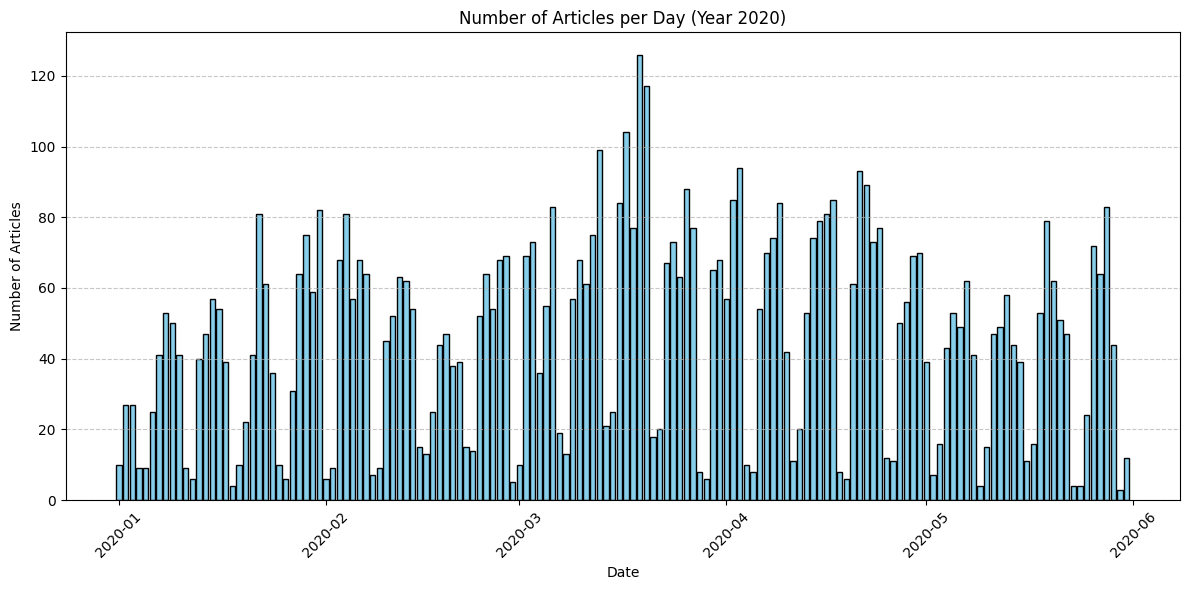

In [8]:

df['Time'] = pd.to_datetime(df['Time'])

# Filter the DataFrame to include only rows from the year 2020
data_2020 = df[(df['Time'] >= '2020-01-01') & (df['Time'] <= '2020-05-31')]

# Group by date and count the number of articles
daily_counts_2020 = data_2020.groupby(data_2020['Time'].dt.date).size()

plt.figure(figsize=(12, 6))
plt.bar(daily_counts_2020.index, daily_counts_2020.values, color='skyblue', edgecolor='black')

plt.title('Number of Articles per Day (Year 2020)')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

## Handle Missing data & Duplicate data


1. I will fill the missing descriptions with empty strings
2. Articles that have missing dates or Headlines are removed from the dataset

In [9]:
# missing data in Headlines, Time, Description 
print(df.isnull().sum())

Headlines      19
Time           28
Description    19
dtype: int64


In [10]:
# Handle missing data
df['Description'].fillna('', inplace=True)  # Fill missing descriptions with empty strings

# Remove rows with missing dates & Headlines
df.dropna(subset=['Time'], inplace=True)
df.dropna(subset=['Headlines'], inplace=True)


<ipython-input-10-a45bf0eab243>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Description'].fillna('', inplace=True)  # Fill missing descriptions with empty strings


In [11]:
print(df.isnull().sum())

Headlines      0
Time           0
Description    0
dtype: int64


* Find the duplicate Articles in dataset and remove duplicate and keep only one in memory.

In [12]:
old_size = df.shape[0]

# drop the duplicate rows in the dataset keep the first one
df = df.drop_duplicates(subset=['Headlines','Description'],keep='first')
df.reset_index(drop=True,inplace=True)
df

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,2020-07-18,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,2020-07-18,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,2020-07-18,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,2020-07-18,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,2020-07-17,A battle in the U.S. Congress over a new coron...
...,...,...,...
32624,White House welcomes looks into reports Trump'...,2018-03-20,President Donald Trump wants Americans' privac...
32625,EU demands 'unilateral' power over UK banks' a...,2018-03-20,European Union governments will insist on thei...
32626,Malaysia says never hired British data firm at...,2018-03-20,The Malaysian government and the ruling party ...
32627,McDonald's sets greenhouse gas reduction targets,2018-03-20,McDonald's Corp on Tuesday announced an approv...


In [13]:
# check the shape of cnbc headline dataset

print("New Size of Dataset:",df.shape)
print("\nDuplicate rows are:",old_size-df.shape[0])

New Size of Dataset: (32629, 3)

Duplicate rows are: 167


## Word Frequencies

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


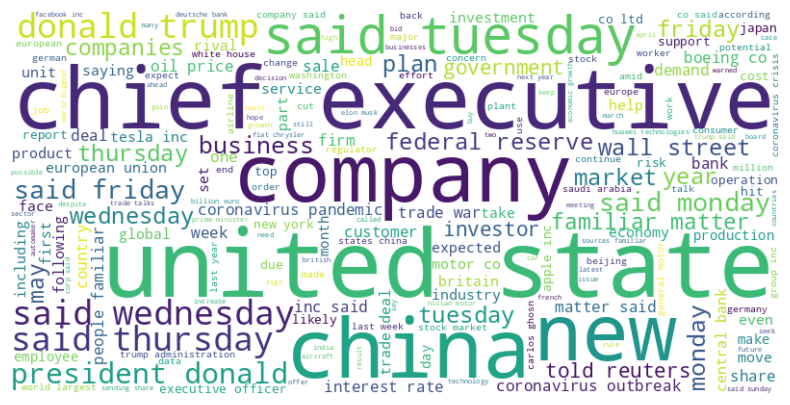

In [14]:
# Word frequencies
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english')).union({
    "said", "the", "dates", "also", "will", "can", "may", "one", "two", "three", 
    "get", "would", "could", "monday", "tuesday", "wednesday", "thursday", 
    "friday", "saturday", "sunday"
})

def preprocess_text(text):
    words = word_tokenize(text.lower())
    filtered_words = [word for word in words if word.isalnum() and word not in stop_words]
    return " ".join(filtered_words)

# df['Description'] = df['Description'].fillna('')  # Replace NaN with an empty string

# Define the text preprocessing function
def preprocess_text(text):
    words = word_tokenize(text.lower())
    filtered_words = [word for word in words if word.isalnum() and word not in stopwords.words('english')]
    return " ".join(filtered_words)

# Apply the preprocessing function
df['Cleaned_Description'] = df['Description'].apply(preprocess_text)

all_words = ' '.join(df['Cleaned_Description'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


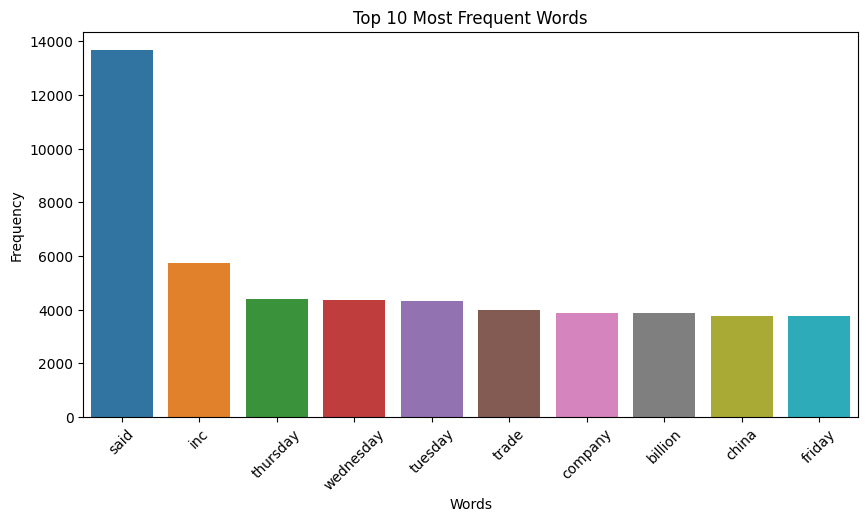

In [15]:
# Bar plot of top 10 most frequent words
top_words = pd.Series(' '.join(df['Cleaned_Description']).split()).value_counts()[:10]
plt.figure(figsize=(10, 5))
sns.barplot(x=top_words.index, y=top_words.values)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words')
plt.xticks(rotation=45)
plt.show()

/



****
****




# Step 2:  Stock Ticker Extraction


This step has two parts:
1. Stock Companies extraction from data.
2. Maps the companies to their Stock Tickers e.g. Apple to AAPL

* We will use Name Entity Recogination NER

  **Named Entity Recognition (NER)** is a technique in natural language processing (NLP) that focuses on identifying and classifying entities.

In [16]:
!python -m spacy download en_core_web_sm
# NER - Spacy NLP pipeline to process our textual data. 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 69.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [17]:
import spacy
from spacy.matcher import Matcher
import pandas_datareader as pdr

In [18]:
df.head(5)

,Headlines,Time,Description,Cleaned_Description
0,TikTok considers London and other locations fo...,2020-07-18,TikTok has been in discussions with the UK gov...,tiktok discussions uk government past months l...
1,Disney cuts ad spending on Facebook amid growi...,2020-07-18,Walt Disney has become the latest company to ...,walt disney become latest company slash advert...
2,Trail of missing Wirecard executive leads to B...,2020-07-18,Former Wirecard chief operating officer Jan M...,former wirecard chief operating officer jan ma...
3,Twitter says attackers downloaded data from up...,2020-07-18,Twitter Inc said on Saturday that hackers were...,twitter inc said saturday hackers able downloa...
4,U.S. Republicans seek liability protections as...,2020-07-17,A battle in the U.S. Congress over a new coron...,battle congress new bill began friday republic...


I will use pre-trained spacy model for Natural Entity Regonation NER to find the Tickers in Dataset. 

In [19]:
# Load spaCy's pre-trained NER model
nlp = spacy.load("en_core_web_sm")

In [20]:

# Load spaCy's pre-trained NER model
nlp = spacy.load("en_core_web_sm")

# Function to extract company names (organizations) using spaCy
def extract_companies(text):
    if pd.isna(text):  # Handle missing values
        return []
    doc = nlp(text)
    return [ent.text for ent in doc.ents if ent.label_ == "ORG"]


dataset = df

# Drop rows where both Headline and Description are NaN
dataset_cleaned = dataset.dropna(subset=["Headlines", "Description"], how="all")

# Apply the function to Headline and Description columns
dataset_cleaned["Companies_in_Headline"] = dataset_cleaned["Headlines"].apply(extract_companies)
dataset_cleaned["Companies_in_Description"] = dataset_cleaned["Description"].apply(extract_companies)

# Combine and deduplicate company names from both columns
dataset_cleaned["Extracted_Companies"] = dataset_cleaned.apply(
    lambda row: list(set(row["Companies_in_Headline"] + row["Companies_in_Description"])), axis=1
)

# Create a single list of all extracted company names
all_companies = dataset_cleaned["Extracted_Companies"].explode().dropna().unique().tolist()

# Print the list of companies
print("List of Companies:", all_companies)


List of Companies: ['TikTok', 'WSJ', 'Facebook Inc', 'the Wall Street Journal', 'Wirecard', 'Twitter Inc', 'Congress', "the Living Dead'", 'the Federal Reserve Bank of Cleveland', 'Cleveland Fed', 'Google', "Alphabet Inc's", 'COVID-19', 'Reuters', 'Delta Air Lines', 'Delta', 'FTC', 'The U.S. Federal Trade Commission', "Facebook Inc's", 'EU', 'the European Union', "BlackRock Inc's", 'BlackRock', 'European Union', 'euro', 'Boohoo', 'Boohoo Group Plc', 'BioNtech', 'The European Union', 'COVID', 'CureVac', 'Johnson & Johnson', 'Pemex', 'Petroleos Mexicanos', 'Mnuchin', 'Treasury', 'Social Democrat Finance', 'Scholz', 'the International Monetary Fund', 'IMF', 'Euro', 'Asset Management', 'Boeing 747s', 'British Airways', 'The U.S. Federal Reserve', 'Fed', 'Morgan Stanley', 'UBS', 'Thyssenkrupp', 'Icelandair', 'BlackRock Inc', 'EasyJet', 'COO', 'HSBC', 'Lloyds Bank', 'Lloyds', "Netflix Inc's", 'HBO', 'Atlantia', 'abattoir', 'Bored bank', 'Refinitiv', "the London Stock Exchange's", 'Deutsche B

**As, their are so many companies in this list, I only extract Top 50 American Companies form this list**

For, these I use CSV file having the name of Top 50 American Companies and their Ticker,

In [21]:
# CSV file for top American Companies and their Tickers
file_path = '/kaggle/input/top-50-american-stock-companies-dataset/American_Top_50.csv' 
dataset_Companies = pd.read_csv(file_path)

Extract the list of top 50 Companies from Companies dataset CSV file

In [22]:
# List of top 50 American companies (can be updated based on the latest rankings)

top_50_american_companies = dataset_Companies['Companies'].tolist()

# Print the list of companies
print("List of Companies:")
print(top_50_american_companies)

List of Companies:
['Apple', 'Nvidia', 'Microsoft', 'Alphabet', 'Amazon', 'Meta', 'Tesla', 'Broadcom', 'Taiwan Semiconductor', 'Berkshire Hathaway', 'Walmart', 'JPMorgan Chase', 'Eli Lilly', 'Visa', 'ExxonMobil', 'Mastercard', 'UnitedHealth', 'Oracle', 'Costco', 'Home Depot', 'Procter & Gamble', 'Netflix', 'Bank of America', 'Johnson & Johnson', 'Salesforce', 'SAP', 'AbbVie', 'ASML', 'Chevron', 'Coca-Cola', 'Novo Nordisk', 'T-Mobile', 'Wells Fargo', 'Merck', 'Cisco', 'Accenture', 'Toyota', 'Morgan Stanley', 'ServiceNow', 'American Express', 'Blackstone', 'Thermo Fisher', 'Intuitive Surgical', 'IBM', 'Linde', 'AstraZeneca', 'Pepsi', 'Nvidia', 'McDonalds']


Now, store only those companies from the list that are in Top 50 american Companies list.

In [23]:
top_companies_in_list = []

# Filter companies that are in the top 50 American companies
# Use a for loop to find companies in the top 50 list
for company in all_companies:
    if company in top_50_american_companies:
        top_companies_in_list.append(company)

# Print the result
print("\nNumber of Companies in Top 50 Companies: ", len(top_companies_in_list))
print("\n\nCompanies in the top 50 American companies:")
print(top_companies_in_list)



Number of Companies in Top 50 Companies:  39


Companies in the top 50 American companies:
['Johnson & Johnson', 'Morgan Stanley', 'Netflix', 'Microsoft', 'Apple', 'Bank of America', 'Amazon', 'Walmart', 'Tesla', 'Wells Fargo', 'IBM', 'Blackstone', 'Nvidia', 'Merck', 'Visa', 'Procter & Gamble', 'AstraZeneca', 'Toyota', 'Mastercard', 'American Express', 'Chevron', 'Broadcom', 'Eli Lilly', 'Costco', 'Home Depot', 'Coca-Cola', 'JPMorgan Chase', 'SAP', 'UnitedHealth', 'Oracle', 'AbbVie', 'ExxonMobil', 'Novo Nordisk', 'Pepsi', 'ASML', 'Salesforce', 'T-Mobile', 'Accenture', 'Linde']


## Mapping of Company with their Tickers

NEL- Named Entity Linking: Links the Entity/Company with their ticker



In [24]:
tickers_list = []
# Filter the DataFrame to include only rows where the 'Companies' column matches the list
filtered_df = dataset_Companies[dataset_Companies['Companies'].isin(top_companies_in_list)]

print("Companies ---> Tickers")
for _, row in filtered_df.iterrows():
    print(f"{row['Companies']}  ---->  {row['Tickers']}")

tickers_list = filtered_df['Tickers'].tolist()
# Print the tickers
print(len(tickers_list))
print("List of Tickers:")
print(tickers_list)

Companies ---> Tickers
Apple  ---->  AAPL
Nvidia  ---->  NVDA
Microsoft  ---->  MSFT
Amazon  ---->  AMZN
Tesla  ---->  TSLA
Broadcom  ---->  AVGO
Walmart  ---->  WMT
JPMorgan Chase  ---->  JPM
Eli Lilly  ---->  LLY
Visa  ---->  V
ExxonMobil  ---->  XOM
Mastercard  ---->  MA
UnitedHealth  ---->  UNH
Oracle  ---->  ORCL
Costco  ---->  COST
Home Depot  ---->  HD
Procter & Gamble  ---->  PG
Netflix  ---->  NFLX
Bank of America  ---->  BAC
Johnson & Johnson  ---->  JNJ
Salesforce  ---->  CRM
SAP  ---->  SAP
AbbVie  ---->  ABBV
ASML  ---->  ASML
Chevron  ---->  CVX
Coca-Cola  ---->  KO
Novo Nordisk  ---->  NVO
T-Mobile  ---->  TMUS
Wells Fargo  ---->  WFC
Merck  ---->  MRK
Accenture  ---->  ACN
Toyota  ---->  TM
Morgan Stanley  ---->  MS
American Express  ---->  AXP
Blackstone  ---->  BX
IBM  ---->  IBM
Linde  ---->  LIN
AstraZeneca  ---->  AZN
Pepsi  ---->  PEP
Nvidia  ---->  BABA
40
List of Tickers:
['AAPL', 'NVDA', 'MSFT', 'AMZN', 'TSLA', 'AVGO', 'WMT', 'JPM', 'LLY', 'V', 'XOM', 'MA', 'UN

************
********

# Step 3: Financial Data Retrieval

**Collect financial data for the extracted stock tickers.**




In [25]:
!pip install yfinance

In [26]:
import yfinance as yf
import time
import numpy as np

In [27]:
# Function to fetch stock data for a single ticker
def fetch_stock_data(ticker):
    try:
        stock = yf.Ticker(ticker)
        # Fetch historical data (last year's daily close prices)
        historical_data = stock.history(period="1y")['Close']
        historical_data.name = ticker  # Set the ticker as the column name
        # Fetch financial metrics
        market_cap = stock.info.get('marketCap', None)
        pe_ratio = stock.info.get('trailingPE', None)
        return historical_data, market_cap, pe_ratio
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        return None, None, None

In [28]:
# Initialize an empty list to store stock data
stock_data_list = []


# Loop through each ticker to fetch data
for ticker in tickers_list:
    print(f"Fetching data for {ticker}...")
    historical_data, market_cap, pe_ratio = fetch_stock_data(ticker)
    if historical_data is not None:
        # Combine financial metrics and add to the stock data list
        stock_data_list.append({
            "Ticker": ticker,
            "Market Cap": market_cap,
            "P/E Ratio": pe_ratio,
            "Historical Data": historical_data
        })
    time.sleep(1)  # Pause between API calls to avoid rate limits

# Combine all historical data into a single DataFrame
historical_df = pd.concat([data["Historical Data"] for data in stock_data_list], axis=1)

# Create a summary DataFrame for financial metrics
metrics_df = pd.DataFrame([{
    "Ticker": data["Ticker"],
    "Market Cap": data["Market Cap"],
    "P/E Ratio": data["P/E Ratio"]
} for data in stock_data_list])

# Save data locally
historical_df.to_csv("historical_stock_data.csv", index=True)
metrics_df.to_csv("financial_metrics.csv", index=False)

# Print confirmation
print("Data fetching complete.")
print("Historical data saved to 'historical_stock_data.csv'.")
print("Financial metrics saved to 'financial_metrics.csv'.")

Fetching data for AAPL...
Fetching data for NVDA...
Fetching data for MSFT...
Fetching data for AMZN...
Fetching data for TSLA...
Fetching data for AVGO...
Fetching data for WMT...
Fetching data for JPM...
Fetching data for LLY...
Fetching data for V...
Fetching data for XOM...
Fetching data for MA...
Fetching data for UNH...
Fetching data for ORCL...
Fetching data for COST...
Fetching data for HD...
Fetching data for PG...
Fetching data for NFLX...
Fetching data for BAC...
Fetching data for JNJ...
Fetching data for CRM...
Fetching data for SAP...
Fetching data for ABBV...
Fetching data for ASML...
Fetching data for CVX...
Fetching data for KO...
Fetching data for NVO...
Fetching data for TMUS...
Fetching data for WFC...
Fetching data for MRK...
Fetching data for ACN...
Fetching data for TM...
Fetching data for MS...
Fetching data for AXP...
Fetching data for BX...
Fetching data for IBM...
Fetching data for LIN...
Fetching data for AZN...
Fetching data for PEP...
Fetching data for BABA

In [29]:
historical_df.head(10) 
print("\n")
historical_df.tail(14) 

,AAPL,NVDA,MSFT,AMZN,TSLA,AVGO,WMT,JPM,LLY,V,...,ACN,TM,MS,AXP,BX,IBM,LIN,AZN,PEP,BABA
Date,,,,,,,,,,,,,,,,,,,,,
2024-12-30 00:00:00-05:00,252.199997,137.490005,424.829987,221.300003,417.410004,235.580002,90.570000,238.090363,773.840027,315.309998,...,352.489990,195.660004,125.750000,296.632568,172.050003,220.250000,417.660004,65.570000,151.720001,84.129997
2024-12-31 00:00:00-05:00,250.419998,134.289993,421.500000,219.389999,403.839996,231.839996,90.349998,238.478348,772.000000,316.040009,...,351.790009,194.610001,125.720001,296.093842,172.419998,219.830002,418.670013,65.519997,152.059998,84.790001
2025-01-02 00:00:00-05:00,243.850006,138.309998,418.579987,220.220001,379.279999,231.979996,90.000000,238.766861,778.070007,314.399994,...,348.820007,193.119995,124.779999,297.729980,173.750000,219.940002,414.170013,65.879997,150.210007,84.949997
2025-01-03 00:00:00-05:00,243.360001,144.470001,423.350006,224.190002,410.440002,232.550003,90.779999,242.029999,781.979980,314.910004,...,353.850006,195.250000,125.940002,303.079987,175.910004,222.649994,413.500000,66.250000,149.649994,85.540001
2025-01-06 00:00:00-05:00,245.000000,149.429993,427.850006,227.610001,411.049988,236.410004,91.430000,240.850006,765.099976,313.040009,...,351.329987,190.389999,128.639999,301.880005,174.789993,222.669998,412.910004,66.839996,146.270004,85.519997
2025-01-07 00:00:00-05:00,242.210007,140.139999,422.369995,222.110001,394.359985,228.639999,90.809998,243.169998,773.289978,311.670013,...,356.390015,193.119995,126.879997,302.019989,171.339996,223.960007,414.950012,66.639999,145.399994,84.480003
2025-01-08 00:00:00-05:00,242.699997,140.110001,424.559998,222.130005,394.940002,229.309998,91.800003,243.130005,787.219971,312.600006,...,357.730011,192.550003,127.860001,302.850006,173.970001,223.179993,420.010010,66.580002,146.539993,83.690002
2025-01-10 00:00:00-05:00,236.850006,135.910004,418.950012,218.940002,394.739990,224.309998,93.000000,239.869995,799.900024,307.709991,...,349.790009,183.470001,123.449997,293.299988,164.850006,219.750000,414.149994,67.010002,142.639999,80.529999
2025-01-13 00:00:00-05:00,234.399994,133.229996,417.190002,218.460007,403.309998,225.289993,91.529999,244.210007,797.479980,306.920013,...,349.140015,183.250000,123.989998,297.019989,165.770004,217.399994,421.429993,65.730003,144.500000,80.540001


<ipython-input-30-27c48e4cfd60>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data_2024.resample('M').last()  # Use 'mean' instead of 'last' if average is preferred


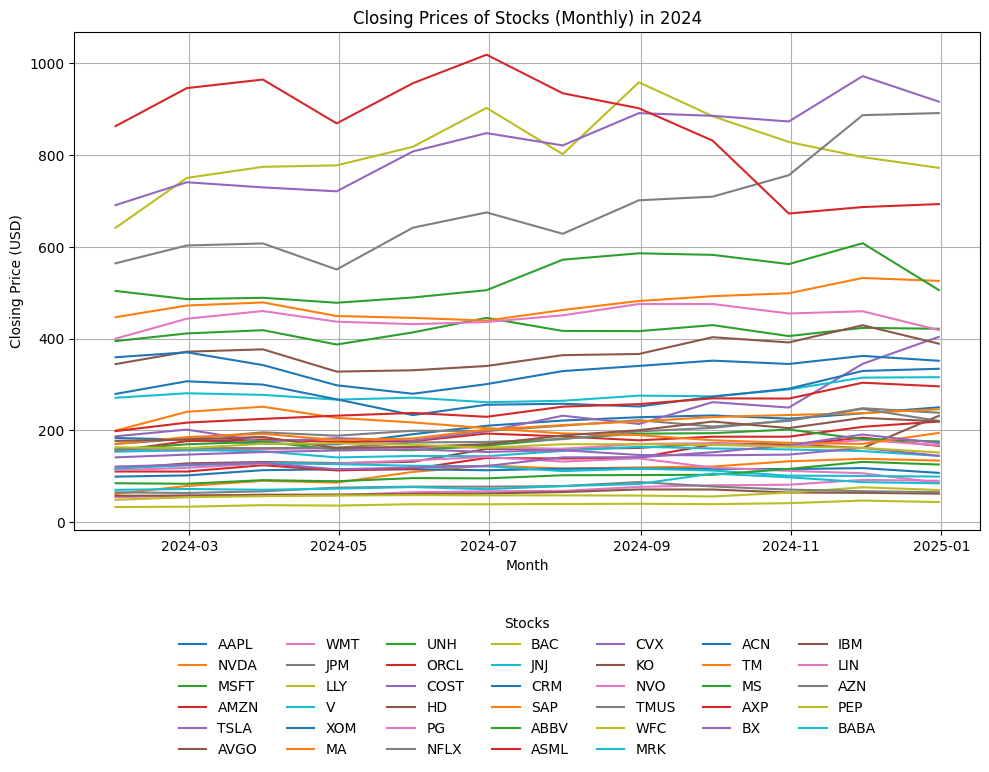

In [30]:
# Filter data for 2024
historical_df.index = pd.to_datetime(historical_df.index)  # Ensure the index is datetime
data_2024 = historical_df.loc['2024']

# Resample to monthly frequency and calculate the last closing price of each month
monthly_data = data_2024.resample('M').last()  # Use 'mean' instead of 'last' if average is preferred

# Plot the closing prices for each month
plt.figure(figsize=(10, 8))
for column in monthly_data.columns:
    plt.plot(monthly_data.index, monthly_data[column], label=column)

# Add title and labels
plt.title("Closing Prices of Stocks (Monthly) in 2024")
plt.xlabel("Month")
plt.ylabel("Closing Price (USD)")
plt.grid(True)

# Place the legend below the plot
plt.legend(title="Stocks", loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=7, frameon=False)

# Adjust layout to fit the legend
plt.tight_layout()

# Display the plot
plt.show()

In [31]:
metrics_df.head(10)

,Ticker,Market Cap,P/E Ratio
0,AAPL,3348037894144,36.618420
1,NVDA,3448926896128,55.664032
2,MSFT,3185845993472,35.325638
3,AMZN,2425915703296,49.297012
4,TSLA,1361290199040,116.183560
5,AVGO,1126419529728,184.853850
6,WMT,747747934208,38.462810
7,JPM,735852756992,13.317975
8,LLY,667607171072,79.994610
9,V,626699796480,33.226902


****
****

[





# **Step 4: Stock Price Forecasting**

### Stock Price Prediction using LSTM

**Predict stock prices using Long Short-Term Memory (LSTM) neural networks. I will use historical stock prices of Apple Inc. (AAPL) over a 6-year period.**

**Importing Required Libraries :**

First, we import all the necessary libraries, For this step

In [32]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [33]:
def stock_data(stock, start_date, end_date):
    tickerSymbol = stock
    tickerData = yf.Ticker(tickerSymbol)
    tickerDf = tickerData.history(period='1d', start=start_date, end=end_date)
    return tickerDf

pred = stock_data("AAPL", "2018-06-08", "2027-06-08")
pred.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-06-08 00:00:00-04:00,45.330415,45.527226,44.998447,45.456089,106627200,0.0,0.0
2018-06-11 00:00:00-04:00,45.373119,45.520133,45.102801,45.344662,73234000,0.0,0.0
2018-06-12 00:00:00-04:00,45.382606,45.671894,45.325695,45.593643,67644400,0.0,0.0
2018-06-13 00:00:00-04:00,45.626827,45.735905,45.157329,45.218979,86553600,0.0,0.0
2018-06-14 00:00:00-04:00,45.420536,45.425279,45.105164,45.242695,86440400,0.0,0.0


**Plotting Fetched Data :**

We plot the closing price history of the stock.

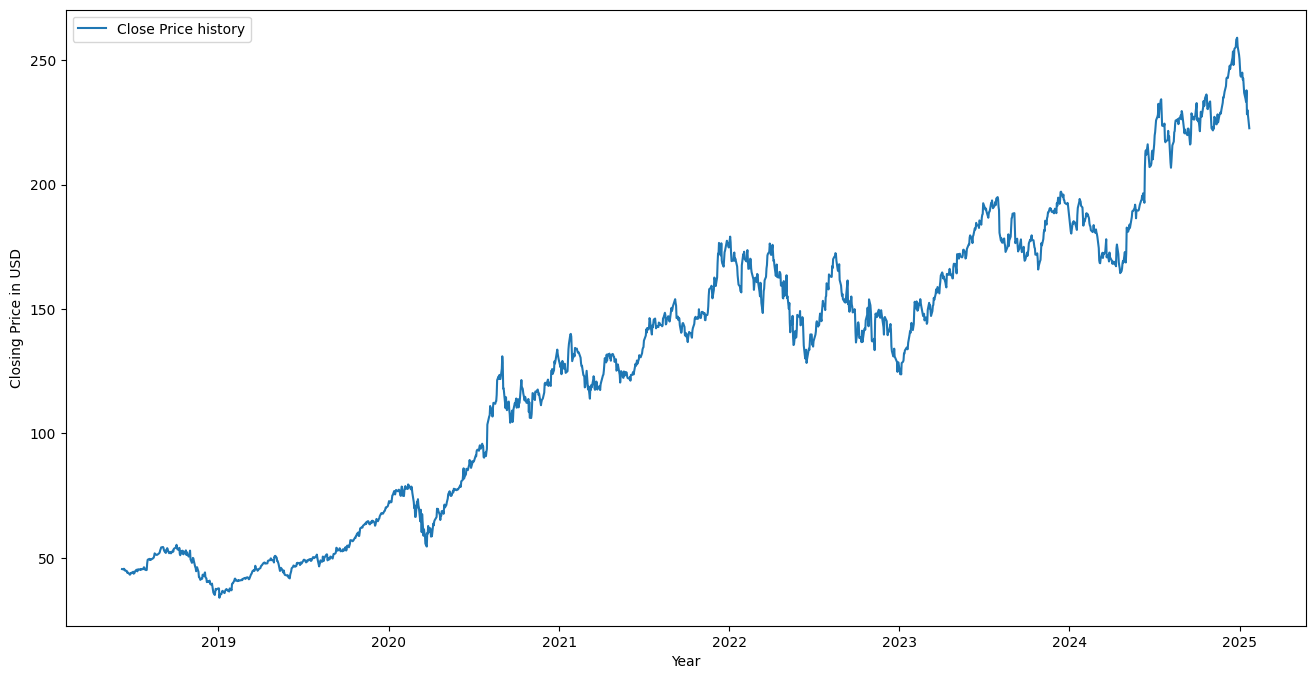

In [34]:
fig = plt.figure(figsize=(16,8))
plt.xlabel("Year")
plt.ylabel("Closing Price in USD")
plt.plot(pred['Close'], label='Close Price history')
plt.legend()
plt.show()

**Checking Data Types and Descriptive Statistics :**

We check the data types of each column and descriptive statistics to ensure data consistency.

In [35]:
pred.dtypes
pred.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1664.000000,1664.000000,1664.000000,1664.000000,1.664000e+03,1664.000000,1664.000000
mean,128.413644,129.810891,127.108996,128.530899,9.747189e+07,0.003394,0.002404
std,57.910995,58.410525,57.430865,57.958304,5.446677e+07,0.027087,0.098058
min,34.379957,34.795441,33.907168,33.952538,2.323470e+07,0.000000,0.000000
25%,67.755321,68.492050,67.287487,67.822577,6.051530e+07,0.000000,0.000000
50%,139.438751,141.324810,136.926031,139.490570,8.401065e+07,0.000000,0.000000
75%,171.117211,172.692009,169.459330,171.554996,1.168965e+08,0.000000,0.000000
max,258.190002,260.100006,257.630005,259.019989,4.265100e+08,0.250000,4.000000


**Resetting Index and Dropping Unnecessary Columns :**

I reset the index to make the date a column and drop columns that are not required for our analysis.

In [36]:
pred.reset_index(level="Date", inplace=True)
pred.drop(columns=['Dividends', 'Stock Splits'], inplace=True)

**Creating Dataset with Closing Price :**

We create a dataset with only the closing price column and set the date as the index.

In [37]:
data = pred.sort_index(ascending=True, axis=0)
pred1 = pd.DataFrame(index=range(0, len(pred)), columns=['Date', 'Close'])
for i in range(0, len(data)):
    pred1["Date"][i] = data['Date'][i]
    pred1["Close"][i] = data["Close"][i]

pred1.index = pred1.Date
pred1.drop("Date", axis=1, inplace=True)
pred1.head()

,Close
Date,
2018-06-08 00:00:00-04:00,45.456089
2018-06-11 00:00:00-04:00,45.344662
2018-06-12 00:00:00-04:00,45.593643
2018-06-13 00:00:00-04:00,45.218979
2018-06-14 00:00:00-04:00,45.242695


**Splitting Data into Train and Test Sets :**

We split the data into training and testing sets.

In [38]:
data = pred1.values
train = data[0:1150, :]
test = data[1150:, :]

print(train.shape)
print(test.shape)


(1150, 1)
(514, 1)


**Normalizing the Data :**

I will normalize the data to the range of 0-1 using MinMaxScaler.

In [39]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

**Preparing Training Data :**

I will prepare the training data by creating sequences of 60 days to predict the next closing price.

In [40]:
x_train, y_train = [], []
window = 60

for i in range(window, len(train)):
    x_train.append(scaled_data[i-window:i, 0])
    y_train.append(scaled_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

**Preparing Test Data :**

We prepare the test data in a similar manner to the training data.

In [41]:
inputs = pred1[len(pred1) - len(test) - window:].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

x_test = []
for i in range(window, inputs.shape[0]):
    x_test.append(inputs[i-window:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

**Building the LSTM Model :**

We build and compile the LSTM model.

In [42]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

**Training the Model :**

We train the model on the training data.

In [43]:
model.fit(x_train, y_train, epochs=8, batch_size=64, verbose=2)


Epoch 1/8
18/18 - 5s - 276ms/step - loss: 0.0210
Epoch 2/8
18/18 - 2s - 98ms/step - loss: 0.0021
Epoch 3/8
18/18 - 2s - 100ms/step - loss: 6.4073e-04
Epoch 4/8
18/18 - 2s - 112ms/step - loss: 5.5820e-04
Epoch 5/8
18/18 - 2s - 109ms/step - loss: 4.8422e-04
Epoch 6/8
18/18 - 2s - 102ms/step - loss: 5.1660e-04
Epoch 7/8
18/18 - 2s - 100ms/step - loss: 5.0719e-04
Epoch 8/8
18/18 - 2s - 99ms/step - loss: 4.5589e-04


**Making Predictions :**

I make predictions on the test data and transform the results back to the original form.

In [44]:
closing_price = model.predict(x_test)
train_predict = model.predict(x_train)

closing_price = scaler.inverse_transform(closing_price)
train_predict = scaler.inverse_transform(train_predict)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


**Calculating Performance Metric :**

We calculate the Mean Squared Error (MSE) on the test data.

In [45]:
mse = math.sqrt(mean_squared_error(test, closing_price))
print(f"Root Mean Squared Error: {mse}")

Root Mean Squared Error: 9.368654948939083


**Plotting the Predictions :**

We plot the actual and predicted closing prices.

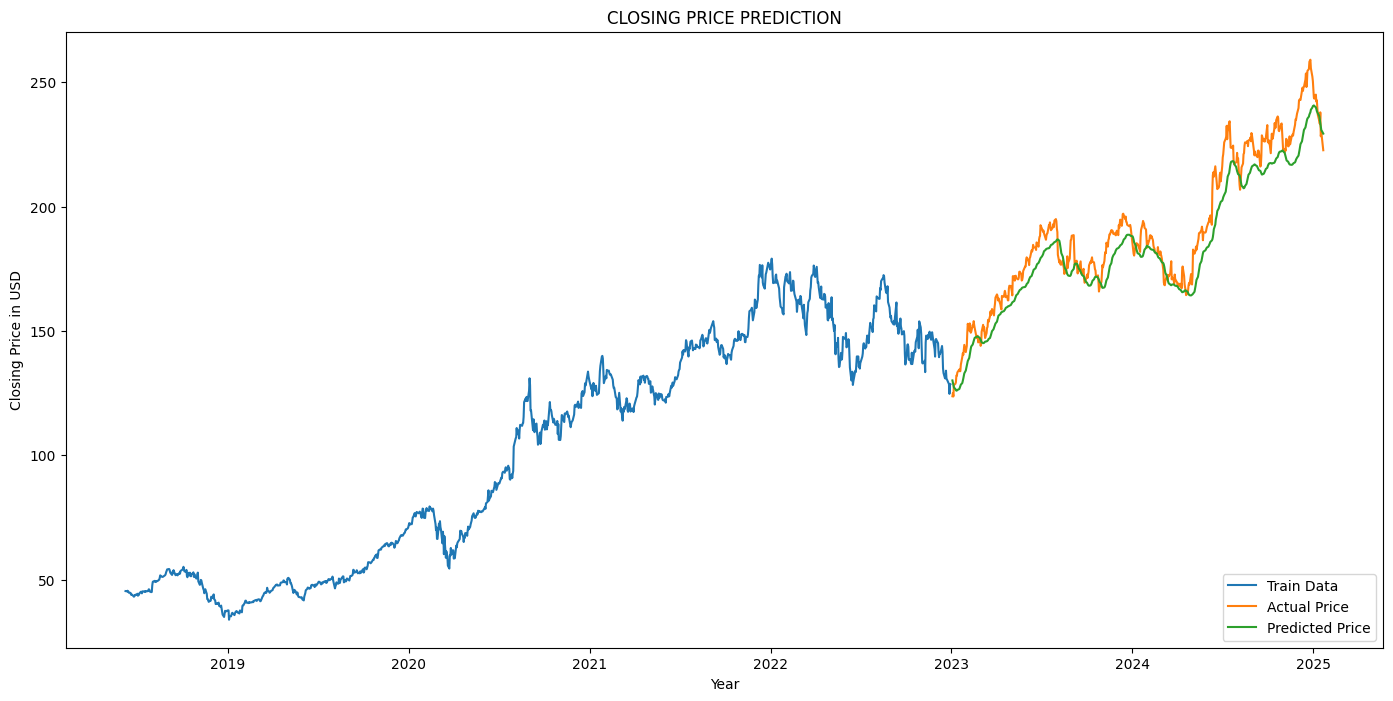

In [46]:
train = pred1[:1150]
test = pred1[1150:]
test['Predictions'] = closing_price

plt.figure(figsize=(17,8))
plt.xlabel("Year")
plt.ylabel("Closing Price in USD")
plt.title("CLOSING PRICE PREDICTION")
plt.plot(train['Close'])
plt.plot(test[['Close', 'Predictions']])
plt.legend(["Train Data", "Actual Price", "Predicted Price"], loc="lower right")
plt.show()

In [47]:
test

,Close,Predictions
Date,,
2023-01-03 00:00:00-05:00,123.768456,130.126236
2023-01-04 00:00:00-05:00,125.045036,129.148743
2023-01-05 00:00:00-05:00,123.718979,128.222733
2023-01-06 00:00:00-05:00,128.271103,127.315300
2023-01-09 00:00:00-05:00,128.795593,126.661263
...,...,...
2025-01-14 00:00:00-05:00,233.279999,235.009888
2025-01-15 00:00:00-05:00,237.869995,233.556824
2025-01-16 00:00:00-05:00,228.259995,232.293686


****
****


# Step 5: News Analysis and Impact Evaluation

In this step I will do:
1. News Sentiment Analysis of Financal dataset
2. Corealate the sentiment with the Stock price of APPLe for year 2020

The **Natural Language Toolkit (NLTK)** is a platform used for building Python programs that work with human language data for applying in statistical natural language processing (NLP).

It contains text processing libraries for tokenization, parsing, classification, stemming, tagging and semantic reasoning.

**Importing Required Libraries :**

First, we import all the necessary libraries for this step.

In [48]:
import nltk
nltk.download('all')
nltk.download('wordnet')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /usr/share/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /usr/share/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron

True

In [49]:
import seaborn as sns
import re  # remove noise and remove URLs from the data 
import plotly.express as px
import string
#import stopwords and text processing libraries
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

# Additionally, download 'omw-1.4' for WordNet Lemmatizer support
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [50]:
# #import machine learning libraries
# from sklearn.svm import LinearSVC

# from sklearn.model_selection import train_test_split
# from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer # Convert data from text to numbers 
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [51]:
# from sklearn.feature_extraction.text import TfidfTransformer


1. **Lowercase** - It is necessary to convert the text to lower case as it is case sensitive.
2. **remove punctuations** - The punctuations present in the text do not add value to the data. The punctuation, when attached to any word, will create a problem in differentiating with other words. so we have to get rid of them.
3. **lemmatizing** - Stopwords include: I, he, she, and, but, was were, being, have, etc, which do not add meaning to the data. So these words must be removed which helps to reduce the features from our data. These are removed after tokenizing the text.
4. **lemmatizing** - A technique that takes the word to its root form. It just removes suffixes from the words. The stemmed word might not be part of the dictionary, i.e it will not necessarily give meaning.
5. **lemmatizing** - Takes the word to its root form called Lemma. It helps to bring words to their dictionary form. It is applied to nouns by default. It is more accurate as it uses more informed analysis to create groups of words with similar meanings based on the context, so it is complex and takes more time. This is used where we need to retain the contextual information.

In [52]:
# create a function for preprocessing 
def preprocessing_text(text):
    
    # convert all to lowercase
    text = text.lower()

    # remove puntuations
    text = text.translate(str.maketrans("","",string.punctuation))

    #remove stopword
    stop_word = set(stopwords.words('english'))
    text_tokens = word_tokenize(text)
    filtered_words = [ word for word in text_tokens if word not in stop_word]
    
    #stemming
    ps = PorterStemmer()
    Stemmed_words = [ ps.stem(w) for w in filtered_words ] 

    #lemmitizing
    lemmatizer = WordNetLemmatizer()
    lemma_words = [ lemmatizer.lemmatize(w,pos='a')for w in Stemmed_words ]
    return " ".join(lemma_words)


In [53]:
# import sentiment intensity analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
# create sentiment intensity analyzer object
analyzer = SentimentIntensityAnalyzer()
#fuction to  decide sentiment as positive, negative and neutral


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [54]:
def get_anaysis(score):
    if score < 0.0:
        return 'negative'
    if score == 0.0:
        return 'neutral'
    else:
        return 'positive'

Copy the financial dataset in  to new varible. using .copy() as it uses pass by value to copy

In [55]:
new_data = df.copy()

# merge headlines and description of new dataset and name it info
new_data.head()


,Headlines,Time,Description,Cleaned_Description
0,TikTok considers London and other locations fo...,2020-07-18,TikTok has been in discussions with the UK gov...,tiktok discussions uk government past months l...
1,Disney cuts ad spending on Facebook amid growi...,2020-07-18,Walt Disney has become the latest company to ...,walt disney become latest company slash advert...
2,Trail of missing Wirecard executive leads to B...,2020-07-18,Former Wirecard chief operating officer Jan M...,former wirecard chief operating officer jan ma...
3,Twitter says attackers downloaded data from up...,2020-07-18,Twitter Inc said on Saturday that hackers were...,twitter inc said saturday hackers able downloa...
4,U.S. Republicans seek liability protections as...,2020-07-17,A battle in the U.S. Congress over a new coron...,battle congress new bill began friday republic...


In [56]:
# only keep info and time column . drop all remaining columns
new_data['info'] = new_data['Headlines'] + new_data['Description']
new_data

,Headlines,Time,Description,Cleaned_Description,info
0,TikTok considers London and other locations fo...,2020-07-18,TikTok has been in discussions with the UK gov...,tiktok discussions uk government past months l...,TikTok considers London and other locations fo...
1,Disney cuts ad spending on Facebook amid growi...,2020-07-18,Walt Disney has become the latest company to ...,walt disney become latest company slash advert...,Disney cuts ad spending on Facebook amid growi...
2,Trail of missing Wirecard executive leads to B...,2020-07-18,Former Wirecard chief operating officer Jan M...,former wirecard chief operating officer jan ma...,Trail of missing Wirecard executive leads to B...
3,Twitter says attackers downloaded data from up...,2020-07-18,Twitter Inc said on Saturday that hackers were...,twitter inc said saturday hackers able downloa...,Twitter says attackers downloaded data from up...
4,U.S. Republicans seek liability protections as...,2020-07-17,A battle in the U.S. Congress over a new coron...,battle congress new bill began friday republic...,U.S. Republicans seek liability protections as...
...,...,...,...,...,...
32624,White House welcomes looks into reports Trump'...,2018-03-20,President Donald Trump wants Americans' privac...,president donald trump wants americans privacy...,White House welcomes looks into reports Trump'...
32625,EU demands 'unilateral' power over UK banks' a...,2018-03-20,European Union governments will insist on thei...,european union governments insist unilateral c...,EU demands 'unilateral' power over UK banks' a...
32626,Malaysia says never hired British data firm at...,2018-03-20,The Malaysian government and the ruling party ...,malaysian government ruling party tuesday deni...,Malaysia says never hired British data firm at...
32627,McDonald's sets greenhouse gas reduction targets,2018-03-20,McDonald's Corp on Tuesday announced an approv...,mcdonald corp tuesday announced approved scien...,McDonald's sets greenhouse gas reduction targe...


In [57]:
# # apply preprocessing on info column
# new_data['info'] = new_data['info'].apply(preprocessing_text)
# new_data.head(10)

In [58]:
# analyze polarity score of values in info and  add new column of it in dataset
info_score=[]
for value in new_data['info'].values:
    info_score.append(analyzer.polarity_scores(value)['compound'])
new_data['info_score'] = info_score
new_data

,Headlines,Time,Description,Cleaned_Description,info,info_score
0,TikTok considers London and other locations fo...,2020-07-18,TikTok has been in discussions with the UK gov...,tiktok discussions uk government past months l...,TikTok considers London and other locations fo...,0.0258
1,Disney cuts ad spending on Facebook amid growi...,2020-07-18,Walt Disney has become the latest company to ...,walt disney become latest company slash advert...,Disney cuts ad spending on Facebook amid growi...,-0.8934
2,Trail of missing Wirecard executive leads to B...,2020-07-18,Former Wirecard chief operating officer Jan M...,former wirecard chief operating officer jan ma...,Trail of missing Wirecard executive leads to B...,-0.6486
3,Twitter says attackers downloaded data from up...,2020-07-18,Twitter Inc said on Saturday that hackers were...,twitter inc said saturday hackers able downloa...,Twitter says attackers downloaded data from up...,-0.3291
4,U.S. Republicans seek liability protections as...,2020-07-17,A battle in the U.S. Congress over a new coron...,battle congress new bill began friday republic...,U.S. Republicans seek liability protections as...,-0.6705
...,...,...,...,...,...,...
32624,White House welcomes looks into reports Trump'...,2018-03-20,President Donald Trump wants Americans' privac...,president donald trump wants americans privacy...,White House welcomes looks into reports Trump'...,0.9300
32625,EU demands 'unilateral' power over UK banks' a...,2018-03-20,European Union governments will insist on thei...,european union governments insist unilateral c...,EU demands 'unilateral' power over UK banks' a...,0.3612
32626,Malaysia says never hired British data firm at...,2018-03-20,The Malaysian government and the ruling party ...,malaysian government ruling party tuesday deni...,Malaysia says never hired British data firm at...,-0.3400
32627,McDonald's sets greenhouse gas reduction targets,2018-03-20,McDonald's Corp on Tuesday announced an approv...,mcdonald corp tuesday announced approved scien...,McDonald's sets greenhouse gas reduction targe...,-0.2263


In [59]:
# apply the function  which decides sentiment to  polarity score column
new_data['sentiment'] = new_data['info_score'].apply(get_anaysis)
new_data.head(30)


,Headlines,Time,Description,Cleaned_Description,info,info_score,sentiment
0,TikTok considers London and other locations fo...,2020-07-18,TikTok has been in discussions with the UK gov...,tiktok discussions uk government past months l...,TikTok considers London and other locations fo...,0.0258,positive
1,Disney cuts ad spending on Facebook amid growi...,2020-07-18,Walt Disney has become the latest company to ...,walt disney become latest company slash advert...,Disney cuts ad spending on Facebook amid growi...,-0.8934,negative
2,Trail of missing Wirecard executive leads to B...,2020-07-18,Former Wirecard chief operating officer Jan M...,former wirecard chief operating officer jan ma...,Trail of missing Wirecard executive leads to B...,-0.6486,negative
3,Twitter says attackers downloaded data from up...,2020-07-18,Twitter Inc said on Saturday that hackers were...,twitter inc said saturday hackers able downloa...,Twitter says attackers downloaded data from up...,-0.3291,negative
4,U.S. Republicans seek liability protections as...,2020-07-17,A battle in the U.S. Congress over a new coron...,battle congress new bill began friday republic...,U.S. Republicans seek liability protections as...,-0.6705,negative
5,Wall Street Week Ahead: Fund managers navigate...,2020-07-17,Investors are searching for bargains in the wo...,investors searching bargains world asset class...,Wall Street Week Ahead: Fund managers navigate...,-0.7845,negative
6,Take Five: Hoping for that V-shape in earnings,2020-07-17,We knew Q2 earnings would be dire but the hope...,knew q2 earnings would dire hope might turn be...,Take Five: Hoping for that V-shape in earnings...,-0.0644,negative
7,Evictions nearly back to pre-pandemic levels i...,2020-07-17,Landlords in some areas of the United States a...,landlords areas united states filing evict ten...,Evictions nearly back to pre-pandemic levels i...,-0.0516,negative
8,Google bans ads on coronavirus conspiracy theo...,2020-07-17,Alphabet Inc's Google said on Friday it would ...,alphabet inc google said friday would prohibit...,Google bans ads on coronavirus conspiracy theo...,-0.7579,negative
9,"Flight to suburbs boosts U.S. homebuilding, bu...",2020-07-17,U.S. homebuilding increased in June by the mos...,homebuilding increased june nearly four years ...,"Flight to suburbs boosts U.S. homebuilding, bu...",0.5994,positive


<Axes: xlabel='sentiment', ylabel='count'>

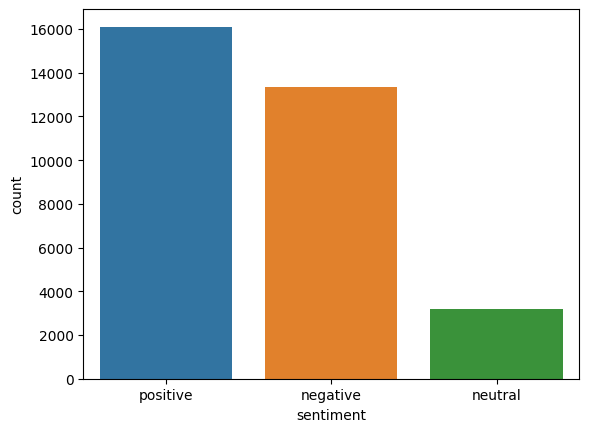

In [60]:
# perform count plot on info_score column
sns.countplot(x='sentiment',data=new_data)

In [61]:
# perform pie chart on info_score column
fig = px.pie(new_data,names='sentiment',title='pie chart for sentiments ')
fig.show()